## Logistic Regression Practical

In this pratical, we will explore classification using the logistic regression approach. 

We will to build and train a logistic model using human cell records, and classify cells to whether the samples are benign (0) or malignant (1) based on certain characteristics.

Before we dive into the practical, here is an overview of key steps in the practical:
* Loading the required libraries
* Data processing and exploration
* Data modelling
* Insight and model evaluation

**The data for this practical was obtained from the IBM cloud storage**.


### Loading the required libraries

In [2]:

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import jaccard_score, log_loss
%matplotlib inline

### Reading and exploring the dataset

In [3]:
### Reading the dataset

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/tumor.csv")
df.head(5)


,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [4]:
df.Class.unique()

array([0, 1], dtype=int64)

### Data processing and exploration

First, lets extract ony those features we need for the model to another dataframe

In [5]:
# Exploring the details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Clump        683 non-null    int64
 1   UnifSize     683 non-null    int64
 2   UnifShape    683 non-null    int64
 3   MargAdh      683 non-null    int64
 4   SingEpiSize  683 non-null    int64
 5   BareNuc      683 non-null    int64
 6   BlandChrom   683 non-null    int64
 7   NormNucl     683 non-null    int64
 8   Mit          683 non-null    int64
 9   Class        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


Notice from above the range of the dataset is 0 to 682, thus each feature should have 683 observation. Notice that all the features contain 683 non-null observations. And the data type in show to be int(64) for all the features.

In [6]:
# Checking for missing values.
df.isnull().sum()

Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [7]:
df.shape

(683, 10)

In [8]:
df.describe()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [9]:
# lets see the count for each customer category
df['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

<Axes: >

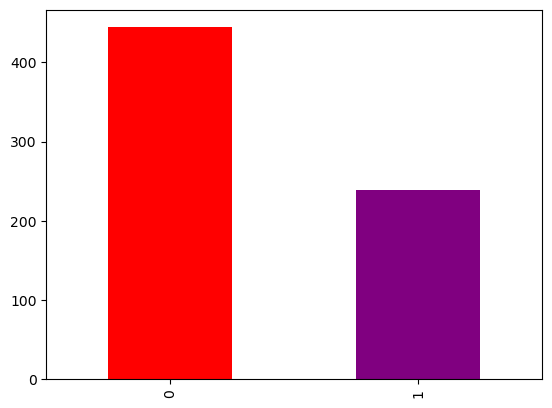

In [10]:
# We can also see the count for each customer category with a graph thus 
df.Class.value_counts().plot.bar(color=['red','purple'])

Now lets split the dataset into two, y for the target variable `Class` and X containing all other features.

In [11]:
# let X contain all the features except custcat
X = df.iloc[:, :-1].values
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [12]:
# let y equals to the target custcat
y = df['Class'].values
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

#### On variable transformation/standardization

Unlike previous practicals, here there will be no need to standardize or normalize the dataset since the dataset are all of the same scale. We will proceed directly to split the dataset into traning and testing set.

Now lets split the datasets into training set and testing set as shown below

In [13]:
# spliting the dataset to training and test set

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=10)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


### Data modelling

Now lets build and fit our logistic regression model

In [14]:
# Building and fitting the logistic regression model
Logr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
Logr

LogisticRegression(C=0.01, solver='liblinear')

Now lets make prediction using test set

In [15]:
# predicting the class using the test set
predicted_y = Logr.predict(X_test)
predicted_y

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0], dtype=int64)

We can also get the probability estimate for each of the predicted class as follows

In [16]:
# probability estimates for the predicted class
predicted_y_prob = Logr.predict_proba(X_test)
predicted_y_prob

array([[0.20535529, 0.79464471],
       [0.70960922, 0.29039078],
       [0.74458625, 0.25541375],
       [0.70240085, 0.29759915],
       [0.5008877 , 0.4991123 ],
       [0.02603871, 0.97396129],
       [0.05805824, 0.94194176],
       [0.78852584, 0.21147416],
       [0.70240085, 0.29759915],
       [0.40327872, 0.59672128],
       [0.74279373, 0.25720627],
       [0.51274837, 0.48725163],
       [0.73758415, 0.26241585],
       [0.02452433, 0.97547567],
       [0.84808102, 0.15191898],
       [0.74941587, 0.25058413],
       [0.02212021, 0.97787979],
       [0.04324603, 0.95675397],
       [0.72839961, 0.27160039],
       [0.6989853 , 0.3010147 ],
       [0.03536367, 0.96463633],
       [0.2626455 , 0.7373545 ],
       [0.72839961, 0.27160039],
       [0.74279373, 0.25720627],
       [0.78852584, 0.21147416],
       [0.65858022, 0.34141978],
       [0.77299705, 0.22700295],
       [0.17131688, 0.82868312],
       [0.03657526, 0.96342474],
       [0.91306015, 0.08693985],
       [0.

### Insight and model evaluation

We can evaluate the performance of the model using the Jaccard index and other evaluation metrics.

In [17]:
# Calculating the jaccard score
jaccard_score(y_test, predicted_y,pos_label=0)

0.9230769230769231

The jaccard score ranges from 0 to 1, where a model that accurately predicts the true label is 1. In this case, the Jaccard score of 0.92 shows high accuracy. We can interprete this to mean the model would be accurate 92% of the time.

Let check other basic classification evaluation metrics

In [ ]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [20]:
evaluate_metrics(y_test, predicted_y)

{'accuracy': 0.948905109489051,
 'recall': array([0.94382022, 0.95833333]),
 'precision': array([0.97674419, 0.90196078]),
 'f1score': array([0.96      , 0.92929293])}

Looking at the accuracy above obtained from the evaluation metric, the high accuracy of 0.94 means the model would be accurate 94% of the time in predicting the label.

#### Final Notes.

* The above logistic model is a binary classification model with just two class. For **multiclass model**, we would have to specify it is a multiclass when training and fitting the model.
* For very large dataset where we suspect overfitting, we can include a **regularization/penalty** akin to the linear regression model when training and fitting the logistic model to address any such overfitting. 

## Thank you for following through